In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
df=pd.read_csv("D:\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\Data\\monthly_milk_production.csv",index_col=
              'Date',parse_dates=True)

In [3]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
df.index.freq='MS'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [6]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


<AxesSubplot:xlabel='Date'>

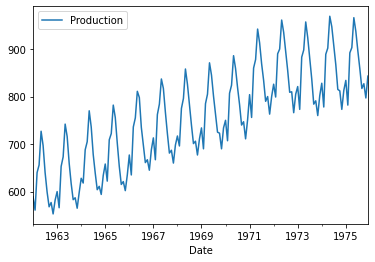

In [7]:
df.plot()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
sd=seasonal_decompose(df['Production'])

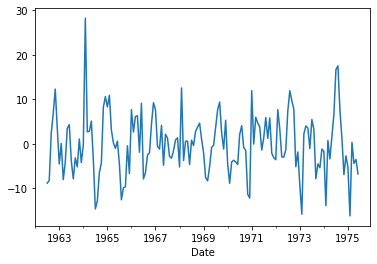

In [10]:
sd.resid.plot();

In [11]:
train=df.iloc[:156,]
test=df.iloc[156:,]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
scaler.fit(train)


MinMaxScaler()

In [15]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
n_input = 12  #No. of rows in the Series
n_features=1  #No. of Columns (1 in this case)

train_generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [20]:
model=Sequential()

model.add(LSTM(120,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 120)               58560     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 121       
Total params: 58,681
Trainable params: 58,681
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit_generator(train_generator,epochs=25)

Epoch 1/25
144/144 [==============================] - 3s 20ms/step - loss: 0.0439
Epoch 2/25
144/144 [==============================] - 2s 15ms/step - loss: 0.0225
Epoch 3/25
144/144 [==============================] - 2s 17ms/step - loss: 0.0175
Epoch 4/25
144/144 [==============================] - 2s 15ms/step - loss: 0.0152: 0s - loss: 0.015
Epoch 5/25
144/144 [==============================] - 2s 14ms/step - loss: 0.0068
Epoch 6/25
144/144 [==============================] - 2s 12ms/step - loss: 0.0070
Epoch 7/25
144/144 [==============================] - 2s 16ms/step - loss: 0.0037
Epoch 8/25
144/144 [==============================] - 2s 15ms/step - loss: 0.0040
Epoch 9/25
144/144 [==============================] - 3s 19ms/step - loss: 0.0052
Epoch 10/25
144/144 [==============================] - 3s 17ms/step - loss: 0.0038
Epoch 11/25
144/144 [==============================] - ETA: 0s - loss: 0.0043- ETA: 1s - los - 2s 15ms/step - loss: 0.0044
Epoch 12/25
144/144 [=================

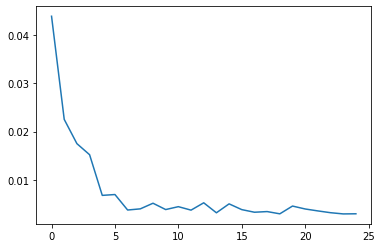

In [23]:
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

## RNN MODEL PREDICTION

In [24]:
test_predictions=[]

first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    
    current_predict=model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch=np.append(current_batch[:,1:,:],[[current_predict]],axis=1)

In [25]:
test_predictions

[array([0.59734666], dtype=float32),
 array([0.6239768], dtype=float32),
 array([0.8085071], dtype=float32),
 array([0.90778655], dtype=float32),
 array([0.9800644], dtype=float32),
 array([0.9634354], dtype=float32),
 array([0.8914008], dtype=float32),
 array([0.76708746], dtype=float32),
 array([0.64150345], dtype=float32),
 array([0.57780904], dtype=float32),
 array([0.53975767], dtype=float32),
 array([0.55384314], dtype=float32)]

In [26]:
true_pred=scaler.inverse_transform(test_predictions)

In [27]:
test['Predictions']=true_pred

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

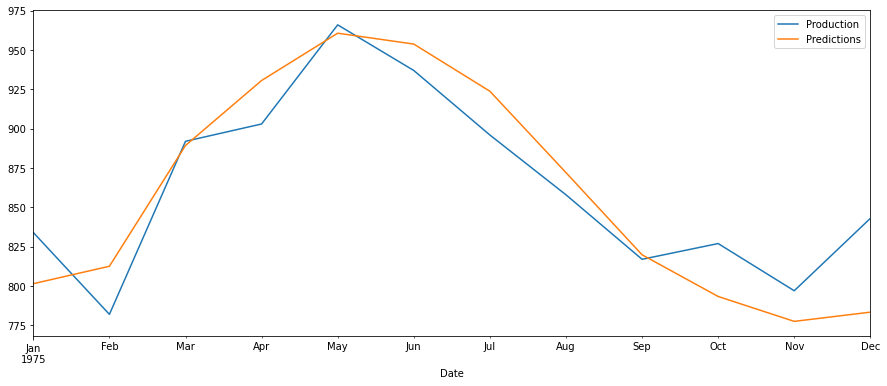

In [28]:
test.plot(figsize=(15,6))

In [29]:
from keras.metrics import mean_squared_error

In [30]:
print(mean_squared_error(test['Production'],test['Predictions']))

tf.Tensor(759.6382, shape=(), dtype=float32)
